Пункт 2:
  θ₀ = 7.3307, θ₁ = 5.6854
  Рівняння: ŷ = 7.3307 + 5.6854·x
  s_xx = 0.0028, s_yy = 0.2258, s_xy = 0.0162
  r = 0.6385, R² = 0.4076


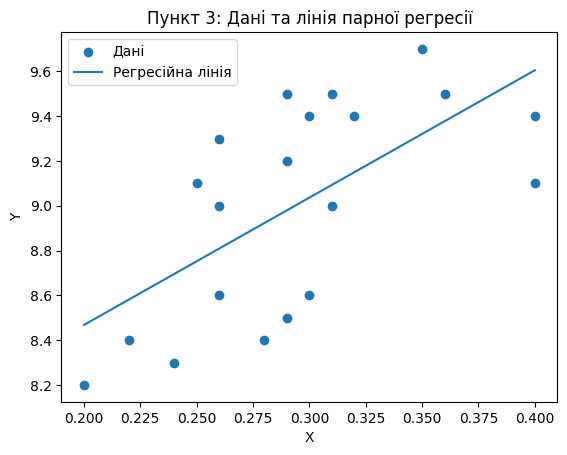


Пункт 4:
  Стандартна помилка рівняння (a) = 0.3757
  Дисперсія Y (s_yy) = 0.2258
  F-статистика = 12.3865, критичне F(1, 18; α=0.05) = 4.4139
  Модель неадекватна даним

Пункт 5:
  95% ДІ для θ₀: [6.3157, 8.3456]
  95% ДІ для θ₁: [2.2915, 9.0792]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f, t

# Дані (X та Y)
X = np.array([0.26, 0.28, 0.31, 0.40, 0.36, 0.30, 0.29, 0.26, 0.24, 0.31,
              0.30, 0.32, 0.40, 0.35, 0.29, 0.20, 0.29, 0.22, 0.25, 0.26])
Y = np.array([9.0, 8.4, 9.0, 9.4, 9.5, 8.6, 9.5, 8.6, 8.3, 9.5,
              9.4, 9.4, 9.1, 9.7, 8.5, 8.2, 9.2, 8.4, 9.1, 9.3])

n = len(X)
mean_X = X.mean()
mean_Y = Y.mean()

# Пункт 1: Створення матриці дизайну
X_mat = np.column_stack((np.ones(n), X))

# Пункт 2: Оцінка коефіцієнтів θ̂ = (XᵀX)⁻¹XᵀY
theta_hat = np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ Y
theta0, theta1 = theta_hat

# Вибіркові дисперсії та коваріація (ділення на n-1)
s_xx = np.sum((X - mean_X)**2) / (n - 1)
s_yy = np.sum((Y - mean_Y)**2) / (n - 1)
s_xy = np.sum((X - mean_X)*(Y - mean_Y)) / (n - 1)
r_xy = s_xy / np.sqrt(s_xx * s_yy)

# R²
Y_hat = X_mat @ theta_hat
SSR = np.sum((Y_hat - mean_Y)**2)
SST = np.sum((Y - mean_Y)**2)
R2 = SSR / SST

print("Пункт 2:")
print(f"  θ₀ = {theta0:.4f}, θ₁ = {theta1:.4f}")
print(f"  Рівняння: ŷ = {theta0:.4f} + {theta1:.4f}·x")
print(f"  s_xx = {s_xx:.4f}, s_yy = {s_yy:.4f}, s_xy = {s_xy:.4f}")
print(f"  r = {r_xy:.4f}, R² = {R2:.4f}")

# Пункт 3: Графік даних та регресійної лінії
plt.figure()
plt.scatter(X, Y, label="Дані")
x_line = np.linspace(X.min(), X.max(), 100)
plt.plot(x_line, theta0 + theta1 * x_line, label="Регресійна лінія")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Пункт 3: Дані та лінія парної регресії")
plt.legend()
plt.show()

# Пункт 4: Перевірка адекватності моделі (F-тест)
SSE = np.sum((Y - Y_hat)**2)
df_reg = 1 # число степенів свободи регресії (p-1)
df_res = n - 2 # залишкові ступені свободи
a = np.sqrt(SSE / df_res) # стандартна помилка рівняння
F_stat = (SSR / df_reg) / (SSE / df_res)
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_reg, df_res)

print("\nПункт 4:")
print(f"  Стандартна помилка рівняння (a) = {a:.4f}")
print(f"  Дисперсія Y (s_yy) = {s_yy:.4f}")
print(f"  F-статистика = {F_stat:.4f}, критичне F(1, {df_res}; α={alpha}) = {F_crit:.4f}")
print("  Модель адекватна даним" if F_stat < F_crit else "  Модель неадекватна даним")

# Пункт 5: 95% довірчі інтервали для θ₀ та θ₁
cov_theta = a**2 * np.linalg.inv(X_mat.T @ X_mat)
se_theta = np.sqrt(np.diag(cov_theta))
t_crit = t.ppf(1 - alpha/2, df_res)

CI_theta0 = (theta0 - t_crit * se_theta[0], theta0 + t_crit * se_theta[0])
CI_theta1 = (theta1 - t_crit * se_theta[1], theta1 + t_crit * se_theta[1])

print("\nПункт 5:")
print(f"  95% ДІ для θ₀: [{CI_theta0[0]:.4f}, {CI_theta0[1]:.4f}]")
print(f"  95% ДІ для θ₁: [{CI_theta1[0]:.4f}, {CI_theta1[1]:.4f}]")

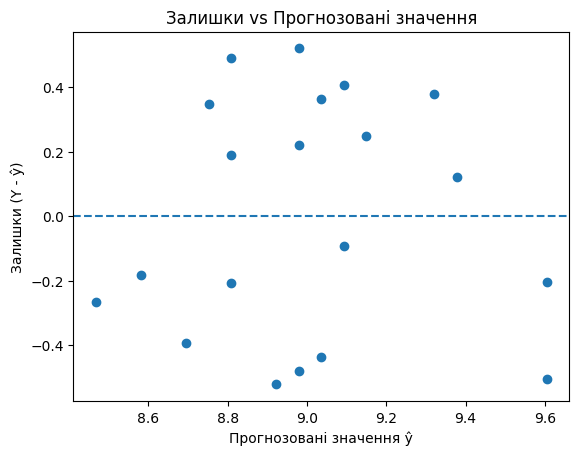

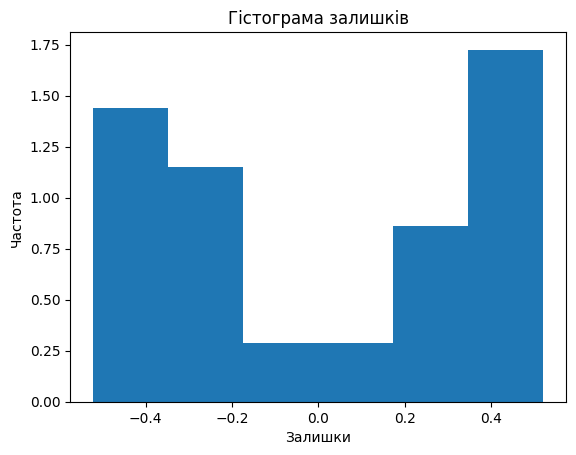

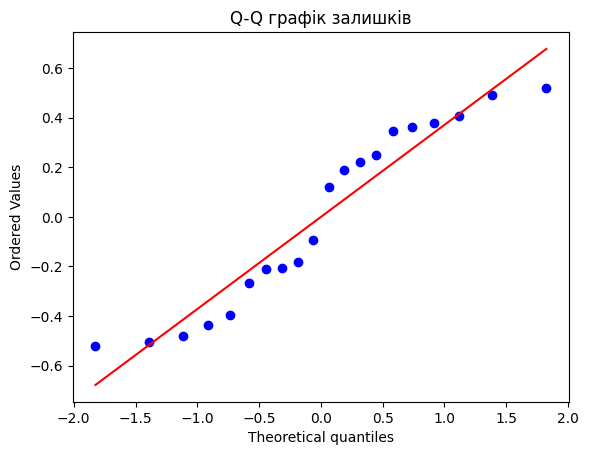

Shapiro–Wilk тест: W = 0.9053, p-value = 0.0518


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Дані (X та Y)
X = np.array([0.26, 0.28, 0.31, 0.40, 0.36, 0.30, 0.29, 0.26, 0.24, 0.31,
              0.30, 0.32, 0.40, 0.35, 0.29, 0.20, 0.29, 0.22, 0.25, 0.26])
Y = np.array([9.0, 8.4, 9.0, 9.4, 9.5, 8.6, 9.5, 8.6, 8.3, 9.5,
              9.4, 9.4, 9.1, 9.7, 8.5, 8.2, 9.2, 8.4, 9.1, 9.3])

# Побудова моделі МНК
n = len(X)
X_mat = np.column_stack((np.ones(n), X))
theta_hat = np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ Y
Y_hat = X_mat @ theta_hat

# Обчислення залишків
residuals = Y - Y_hat

# 1. Графік: залишки vs прогнозовані значення
plt.figure()
plt.scatter(Y_hat, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Прогнозовані значення ŷ")
plt.ylabel("Залишки (Y - ŷ)")
plt.title("Залишки vs Прогнозовані значення")
plt.show()

# 2. Гістограма залишків
plt.figure()
plt.hist(residuals, bins='auto', density=True)
plt.xlabel("Залишки")
plt.ylabel("Частота")
plt.title("Гістограма залишків")
plt.show()

# 3. Q-Q графік для перевірки нормальності залишків
plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q графік залишків")
plt.show()

# Тест Шапіро-Уїлка на нормальність
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro–Wilk тест: W = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
